## Visualisation Réactions iML1515

Charger ce notebook dans l'environnement rdkit

In [1]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw
import cobra
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole

In [2]:
wd = '/Users/aalarcon/Documents/Jupyter/3_Isopropanol/'

In [3]:
model = cobra.io.load_json_model(wd+'input/models/model_PKT.json')

In [4]:
data_struct = pd.read_excel(wd+'input/data/database_struct_mets_iML1515.xlsx')

In [5]:
#agents = 'h nadh nad nadph nadp h2o adp atp gtp gdp fmn fmnh2 q8 q8h2 2dmmq8 2dmmql8 mql8 mqn8 h2o2'.split()

In [28]:
r_id = 'PAI2T'

reaction = rdChemReactions.ChemicalReaction()
r_mets = model.reactions.get_by_id(r_id).metabolites
substs = ['_'.join(m.id.split('_')[:-1]) for m in r_mets if r_mets[m]<0]
substs_names = [data_struct.loc[m, 'name'] for m in substs]
substs_mols = [Chem.MolFromInchi(data_struct.loc[m, 'inchi']) for m in substs]

prods = ['_'.join(m.id.split('_')[:-1]) for m in r_mets if r_mets[m]>0]
prods_names = [data_struct.loc[m, 'name'] for m in prods]
prods_mols = [Chem.MolFromInchi(data_struct.loc[m, 'inchi']) for m in prods]

for s in substs_mols:
    reaction.AddReactantTemplate(s)
for p in prods_mols:
    reaction.AddProductTemplate(p)

Reactants:


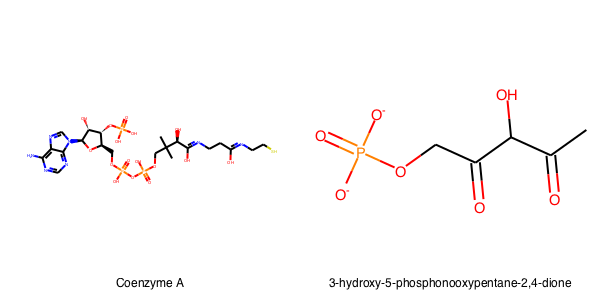

In [29]:
print('Reactants:')
size = 300
img = Draw.MolsToGridImage(substs_mols, legends=substs_names, molsPerRow=len(substs), subImgSize=(size,size))
img

Products:


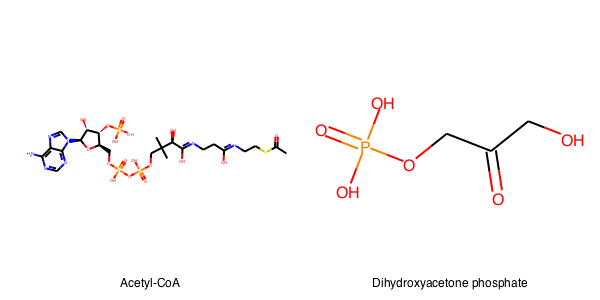

In [30]:
print('Products:')
img = Draw.MolsToGridImage(prods_mols, legends=prods_names, molsPerRow=len(prods), subImgSize=(size,size))
img

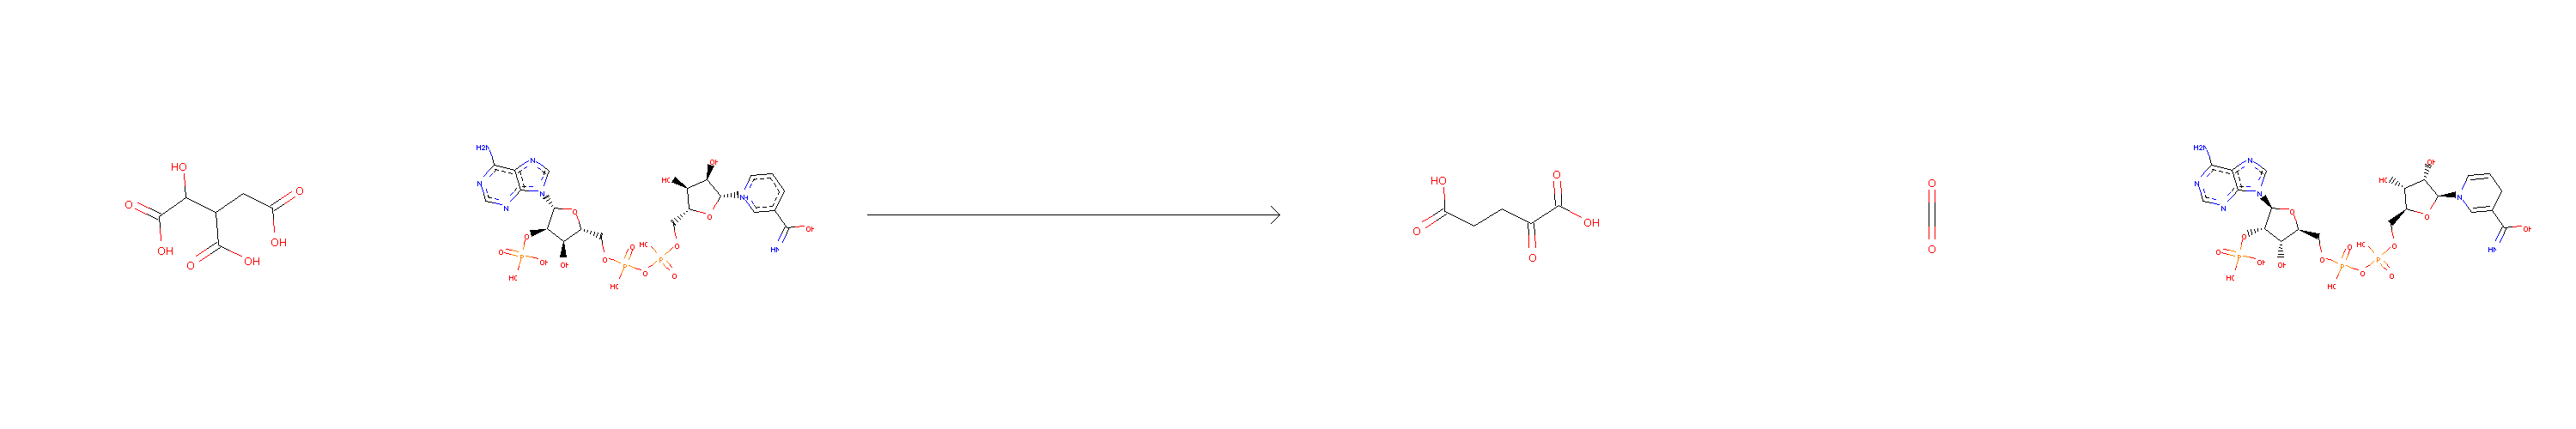

In [10]:
img = Draw.ReactionToImage(reaction, subImgSize=(500, 500))
img

In [31]:
img.save('/Users/aalarcon/Desktop/figs_reunion/react_FACOAE60.png')